In [4]:
# Upload library files to Python
import numpy as np
import pandas as pd
import re
from scipy import stats
import requests
import csv
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


# Check version Control
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)


('Pandas version:', u'0.18.0')
('Numpy version:', '1.10.4')


In [5]:
dataLoad = pd.read_csv("/Users/ltrockle/Desktop/Metis/crash.csv")

In [6]:
#What Type are the data sets?
dataLoad.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [7]:
# Let us look at the top 5 head and tail columns in the Data set
#dataLoad.head(5)
dataLoad.tail(5)




,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,5/20/09,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5/26/09,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,6/1/09,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,6/7/09,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJRξ,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,6/8/09,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [8]:
# How many of what do we have ?
dataLoad.count()

Date            5268
Time            3049
Location        5248
Operator        5250
Flight #        1069
Route           3562
Type            5241
Registration    4933
cn/In           4040
Aboard          5246
Fatalities      5256
Ground          5246
Summary         4878
dtype: int64

In [9]:
# This is Ramesh input to fix the mseey date and time issue.
def format_date(date_val):
    # Extract date, mon, yr
    dt, mon, yr = [int(val) for val in date_val.split("/")]

    if yr >= 10 and yr <= 99:
        yr_pre = "19"
    else:
        yr_pre = "20"
    date = "{:02}/{:02}/{}{:02}".format(dt, mon, yr_pre, yr)
    return date

dataLoad["Date"] = dataLoad["Date"].apply(format_date)

In [10]:
# This is a test to see how the split commmand works
"02/10/09".split("/")

['02', '10', '09']

In [11]:
#This is a fixed output of the Date column 
dataLoad["Date"]

0       09/17/2008
1       07/12/1912
2       08/06/1913
3       09/09/1913
4       10/17/1913
5       03/05/1915
6       09/03/1915
7       07/28/1916
8       09/24/1916
9       10/01/1916
10      11/21/1916
11      11/28/1916
12      03/04/1917
13      03/30/1917
14      05/14/1917
15      06/14/1917
16      08/21/1917
17      10/20/1917
18      04/07/1918
19      05/10/1918
20      08/11/1918
21      12/16/1918
22      05/25/1919
23      07/19/1919
24      10/02/1919
25      10/14/1919
26      10/20/1919
27      10/30/1919
28      03/10/1920
29      03/30/1920
           ...    
5238    11/13/2008
5239    11/16/2008
5240    11/27/2008
5241    12/03/2008
5242    12/11/2008
5243    12/15/2008
5244    01/04/2009
5245    01/15/2009
5246    02/07/2009
5247    02/07/2009
5248    02/12/2009
5249    02/15/2009
5250    02/20/2009
5251    02/25/2009
5252    03/09/2009
5253    03/12/2009
5254    03/22/2009
5255    03/23/2009
5256    04/01/2009
5257    04/06/2009
5258    04/09/2009
5259    04/1

In [12]:
# Question 1:  I have is get the Date And Time part straightened out.
# Question 2: A good question to ask in a new column is how many passengers and crew survived the impact.

dataLoad['Date'] = pd.to_datetime(dataLoad['Date'])
dataLoad['Year'] = dataLoad['Date'].dt.year
dataLoad['Survived']= dataLoad['Aboard'] - dataLoad['Fatalities']

dataLoad.head (10)
# 14 is now Year alone ( Data Wrangeling is hard)
#15 shows the Survivors



,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,2008-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",2008,1.0
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0
5,1915-03-05,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...,1915,20.0
6,1915-09-03,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when...",1915,0.0
7,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown.",1916,0.0
8,1916-09-24,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.,1916,0.0
9,1916-10-01,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...,1916,0.0


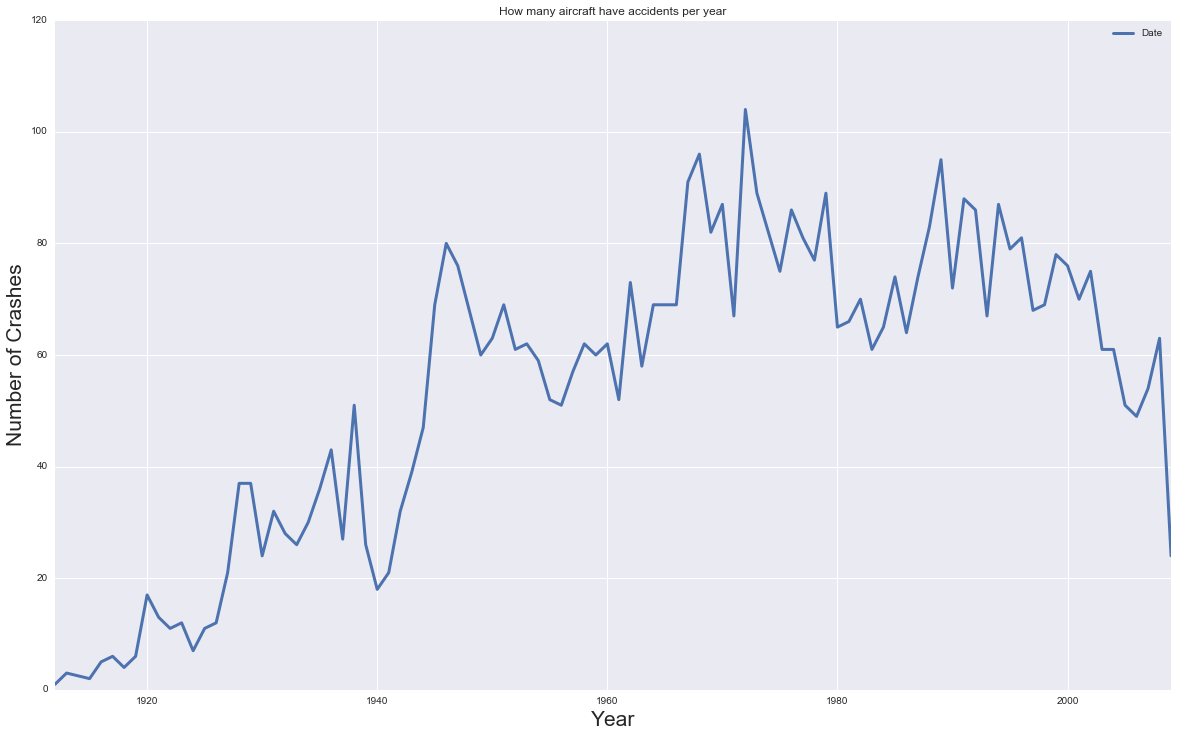

In [13]:
CrashpYear =dataLoad.loc[:,["Date","Year"]].groupby(['Year']).count()
plot1 = CrashpYear.plot(lw=3,title = 'How many aircraft have accidents per year', figsize = (20,12))
plot1.set_xlabel("Year", fontsize= 21)
plot1.set_ylabel("Number of Crashes", fontsize = 21)



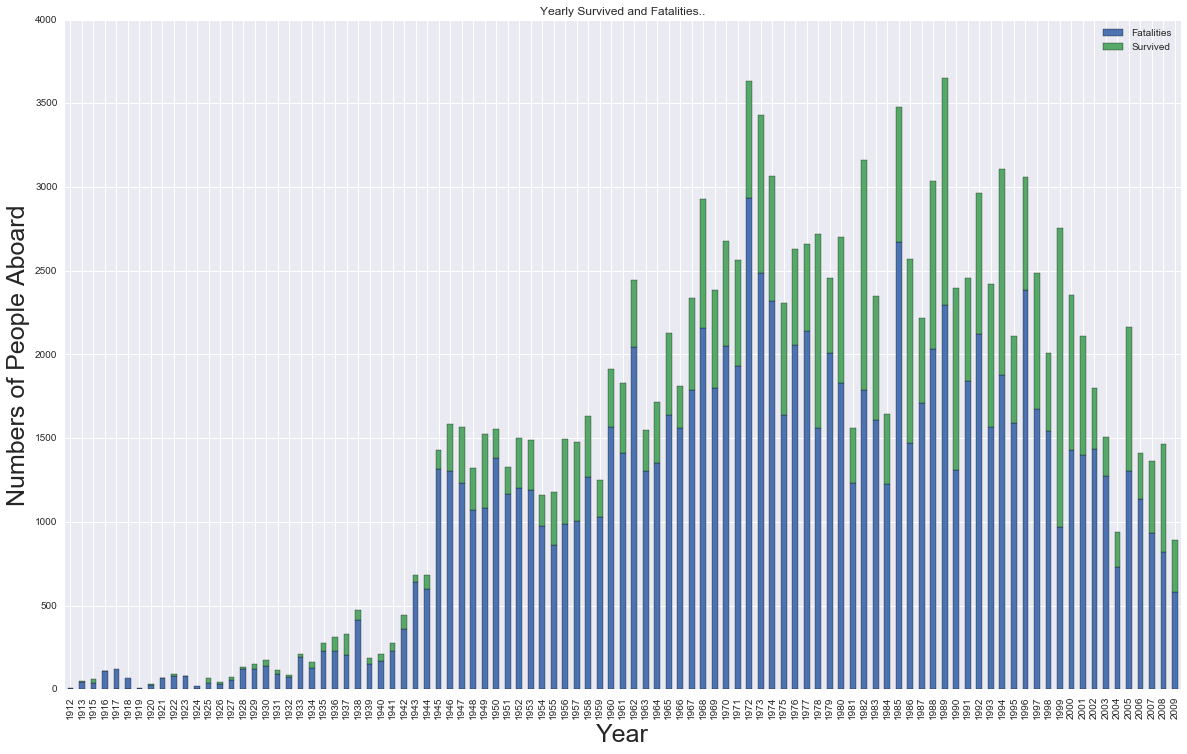

In [14]:
#Looking into more details in a histogram

YearStats = dataLoad.loc[:, ["Year","Fatalities", "Survived"]].groupby(['Year']).sum()
plot2 = YearStats.plot.bar(stacked=True, title='Yearly Survived and Fatalities..', figsize=(20,12))
plot2.set_xlabel("Year", fontsize=25)
plot2.set_ylabel("Numbers of People Aboard", fontsize=25)

In [15]:
# Is their a correlation between the passengers on board and the survivors ?

SurCorr = dataLoad[['Aboard','Survived']]
print('What is the survival correlation between passengers Aboard and the Survivors ?')
SurCorr.corr(method ='spearman')


What is the survival correlation between passengers Aboard and the Survivors ?


,Aboard,Survived
Aboard,1.000000,0.351657
Survived,0.351657,1.000000


In [16]:
#print('What is the max num of survivors after a crash?')
#Survivmax =  dataLoad.groupby['Survived'].max()

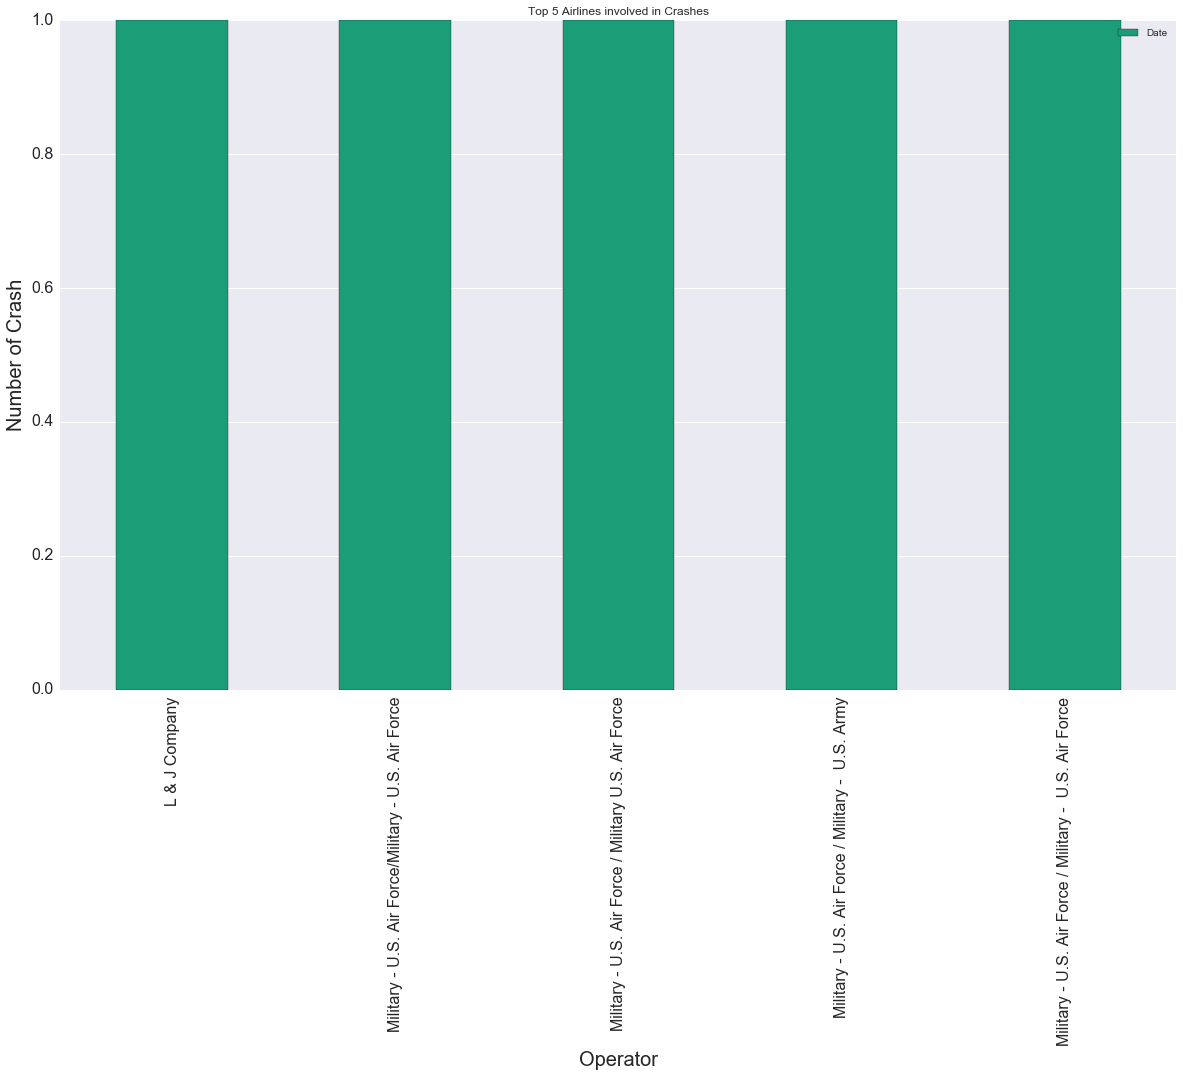

In [21]:
#Which Airline has the worst record ?
WhatAirline = dataLoad.loc[:,["Operator", "Date"]].groupby(['Operator']).count()
WhatAirline = WhatAirline.sort_values(by = "Date", ascending = True).head(5)

plot3 = WhatAirline.plot.bar(fontsize = 16, colormap = 'Dark2',figsize = (20,12),title = "Top 5 Airlines involved in Crashes")
plot3.set_xlabel("Operator", fontsize=20,)
plot3.set_ylabel("Number of Crash", fontsize=20,)